## Jarvis Chatbot using Recurrent Neural Network

## 1. Importing the modules and the libraries 

In [72]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style ="whitegrid", color_codes=True)

## 2. Creating the dataset

In [74]:
%%writefile content.json
{"intents":
  [
    {
      "tag":"greeting",
      "input":["hello!!","hi! there..","welcome!!","nice:>:>","wind up...","dear!!","say u're good;","hey!!","fine??","geekzzzzzzz","thank the lord!!","say cheezzzeeee","how may i help you?????","sweet!!"],
      "responses":[
            "Hi. Welcome to the universe",
            "The universe is too big",
            "Everest is largest among all mountains",
            "Hey yo, do you need help",
            "Common, lets have a nice talk",
            "Science generates solutions for everyday life",
            "Hey, thanks for talking",
            "Cheer up baby",
            "Tchoumour Lancma",
            "The recovery and assimilation of Greek works",
            "Go to sleep",
            "Hey, there",
            "The story of New Zealand's Robert Rob Edwin Hall",
            "Scientific and interesting",
            "Welcome to the world of Jarvis",
            "Say, hail the lord",
            "answer the great mysteries of the universe",
            "some of the earliest archeological evidence for scientific reasoning is tens of thousands of years old.",
            "Mount Everest as the name for the highest mountain in the world",
            "Hey Indian",
            "Lets wind up"
      ]
    },
    {
      "tag":"bye",
      "input":["byebye...","merry!","shayonara!!","tata:::","go away!!!","hell","march away.....","good bye!","good gracious","good night.....","out","no way","get lost!!!!"],
      "responses":[
            "We are lost",
            "Thank you"
      ]
    },
    {
      "tag":"howami", 
      "input":["fine man....","very well!!!","health and wealth","healthy","nice joke","going well","are you ok???","good??!!","happy and jovial...","very pretty","live strong","precious!!","how are you???","nice talking to you","fine right","looking good!!!","r u ok?","who else there with you???","Jarvis are you there????","Jarvis where are you???","who is sleeping???"],
      "responses":[
            "I am fine",
            "I am happy, how are you",
            "Too good, happy with you",
            "Nepal did not allow foreigners to enter the country at the time",
            "I live in India",
            "Science is a systematic enterprise that builds and organizes knowledge",
            "Go take a short nap",
            "Fine and right, I shall not keep quiet",
            "Jarvis is busy",
            "our high-resolution 3D map and discover all routes for trekking and mountaineering",
            "Well done, make merry",
            "The Tibetan name for Everest is Qomolangma",
            "In 1802, the British began the Great Trigonometric Survey of India to fix the locations, heights, and names of the world's highest mountains",
            "Wise the king lives",
            "Sunny and bright",
            "Well, well",
            "According to Michiel de Vaan, Dutch linguist and Indo-Europeanist, sciō may have its origin in the Proto-Italic language",
            "God gracious",
            "Science may be as old as the human species",
            "Jarvis hails for the lord",
            "Give me a wild and stormy land",
            "Low lives the high",
            "Joking!",
            "How is the young rat"
      ]
    },
    {
      "tag":"who",
      "input":["whats your name?","hi there","how are you??","Where are you!!?","How old are you?","What do you do??","What is your special power?","Tell me your name please","Go and find me a pet....","Call me please!!","What is your parents name?!","Where is your family??","Do you live in a house??"],
      "responses":[
            "Hi. My name is Jarvis, What is your name?",
            "I am fine.",
            "I am in India",
            "My age is more than yours",
            "cucumbers can help fight free radicals in your body",
            "I am a top cop. Fire you!!",
            "I am superJarvis",
            "Greek conceptions and traditions",
            "chemistry provides global work opportunities",
            "I am Jarvis the Talking robot",
            "The China–Nepal border runs across its summit point",
            "Call you right now. Please tell me your number",
            "suffix -cience",
            "Hello kitty",
            "My mother's name is Angela",
            "The Chinese mountaineering team of Wang Fuzhou, Gonpo, and Qu Yinhua made the first reported ascent of the peak",
            "I am a chatBot",
            "Love you so much",
            "Hey baby",
            "Stylish and cucumber",
            "Sweet",
            "King of England",
            "I live in a two stored building with five dogs and two birds"
      ]
    },
    {
      "tag":"where",
      "input":["Howdy!!","the place is beautiful","my name is khan!","slow moves","guy ur mad!","love...","place of peace","a dove","obey me","cool place to live","winter has come","too hot","mad people","how do you dream?","hey go and make merry","a church","google it!!"],
      "responses":[
            "Look, the Everest",
            "Hey yo, lets climb and trek",
            "Modern science is typically divided into three major branches",
            "Mount Everest is Earth's highest mountain above sea level",
            "chemistry, the science that deals with the properties, composition, and structure of substances",
            "Mighty king Solomon",
            "The atom and molecules are the basic unit or components of Chemistry",
            "Down goes the river",
            "Mount Everest attracts many climbers, including highly experienced mountaineers",
            "Dance with me",
            "There are many hypotheses for science's ultimate word origin",
            "Too noisy",
            "situated in the Mahalangur Himal sub-range of the Himalayas",
            "Snowy rainy",
            "Love me the lord",
            "Jesus",
            "Lavoisier",
            "I am mad",
            "giddy, energetic, and euphoric",
            "Chemistry is when your interactions with the other person just work incredibly well and feel very natural",
            "May the soul rest in peace",
            "meeting our basic needs of food, clothing, shelter, health, energy, and clean air, water, and soil",
            "Jeevansathi.com",
            "Go to",
            "Like me",
            "I am born here",
            "The first recorded efforts to reach Everest's summit were made by British mountaineers",
            "Slowly",
            " transformed by the Scientific Revolution ",
            "Time to eat",
            "Snapshot!"
      ]
    },
    {
      "tag":"pre",
      "input":["devtown","I am Subhanjan","I am Soumya Deep","google and microsoft!!!","small place","interviews","chatbot","cancel","love me","token","coin","have mercy!!!"],
      "responses":[
            "Hi. I am Jarvis the chatBot",
            "Advancing excellence",
            "Ridiculous",
            "The word chemistry is said to have roots in either ancient Egypt or Greece",
            "The word science has been used in Middle English",
            "Welcome to the future",
            "natural sciences, the social sciences and the formal sciences",
            "How comes that possible?",
            "Everest presents dangers such as altitude sickness, weather, and wind, as well as hazards from avalanches and the Khumbu Icefall.",
            "Eureka, an asteroid",
            "FAANGS and MAANGS",
            "the study of matter",
            "Too cloudy",
            "High levels of dopamine and a related hormone, norepinephrine",
            "Invisible",
            "Happy summer",
            "Lead me",
            "Grasshopper",
            "Snipers ahead",
            "Hey Soumya, do I know you?",
            "Explores all fields of chemical science across the periodic table",
            "Subhanjan, help me out",
            "Joy and trust makes a relationship",
            "Goal!!"
      ]
    }
  ]
}

Overwriting content.json


## 3. Importing and reading the required json dataset

In [75]:
with open('/content/content.json') as content:
  data1=json.load(content)

## 4. Tokenizing the tagged dataset 

In [76]:
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

## 5. Data Preparation

In [77]:
data=pd.DataFrame({"inputs":inputs,"tags":tags})

## 6. Loading Datasets

In [78]:
data

,inputs,tags
0,hello!!,greeting
1,hi! there..,greeting
2,welcome!!,greeting
3,nice:>:>,greeting
4,wind up...,greeting
...,...,...
85,cancel,pre
86,love me,pre
87,token,pre
88,coin,pre


## 7. Data Cleaning and Outlier checking

In [79]:
print(data.isnull().sum())

inputs    0
tags      0
dtype: int64


In [80]:
print(data.inputs.value_counts()[:])
print(data.tags.value_counts()[:])

hello!!             1
place of peace      1
guy ur mad!         1
slow moves          1
my name is khan!    1
                   ..
very well!!!        1
fine man....        1
get lost!!!!        1
no way              1
have mercy!!!       1
Name: inputs, Length: 90, dtype: int64
howami      21
where       17
greeting    14
bye         13
who         13
pre         12
Name: tags, dtype: int64


## 7. Exploratory Analysis

0           hello!!
1       hi! there..
2         welcome!!
3          nice:>:>
4        wind up...
          ...      
85           cancel
86          love me
87            token
88             coin
89    have mercy!!!
Name: inputs, Length: 90, dtype: object
['greeting' 'bye' 'howami' 'who' 'where' 'pre']


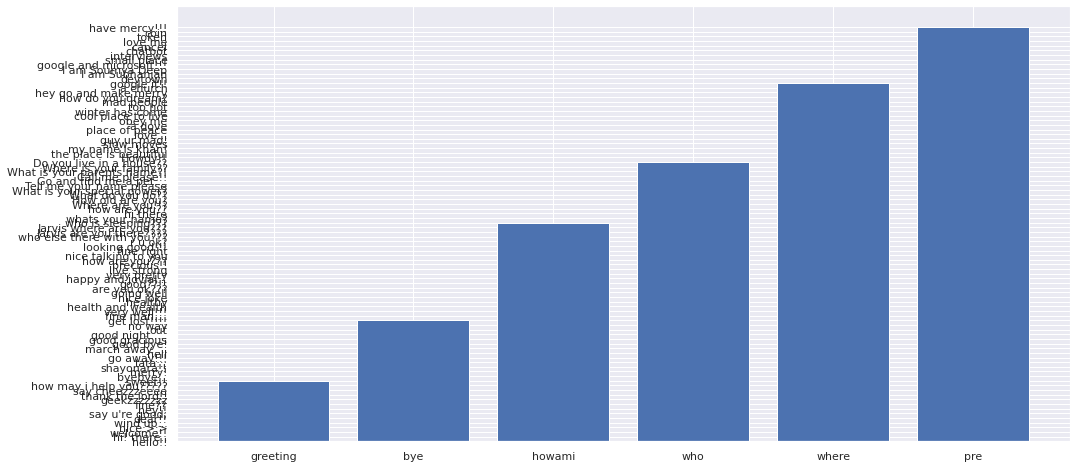

In [87]:
request=data[0:]['inputs']
response=data.iloc[0:]['tags']
print(request)
print(response.unique())
plt.figure(1,figsize=(16,8))
plt.bar(response,request)
plt.savefig('plot1')

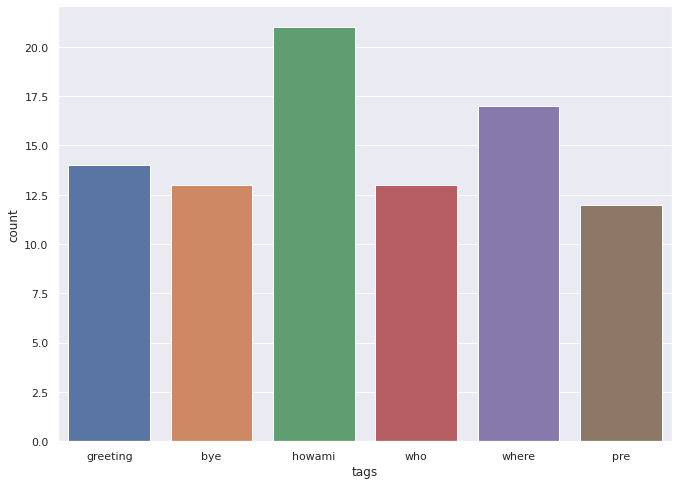

<Figure size 792x576 with 0 Axes>

In [88]:
sns.countplot(x='tags', data=data)
plt.show()
plt.savefig('plot2')

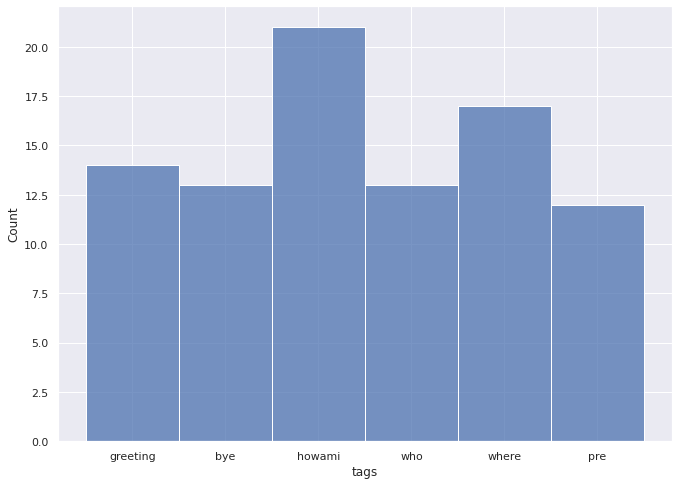

<Figure size 792x576 with 0 Axes>

In [89]:
sns.set(rc={'figure.figsize':(11, 8)})
sns.histplot(data['tags'], bins= 30)
plt.show()
plt.savefig('plot3')

In [97]:
def plot_inputs_based_tags(param1,param2):
  x1=data.iloc[0:][param1]
  x2=data.iloc[0:][param2]
  t1=range(len(x1))
  t2=range(len(x2))
  plt.figure(1,figsize=(10,4))
  title2="Plot 1-> Range vs ",param2
  plt.title(title2)
  plt.xlabel('Range')
  plt.ylabel(param2)
  plt.bar(t2,x2,alpha=0.5,color='grey')
  plt.show()
  plt.savefig('plot4')
  plt.figure(2,figsize=(10,4))
  title1="Plot 2-> Range vs ",param1
  plt.title(title1)
  plt.xlabel('Range')
  plt.ylabel(param1)
  plt.bar(t1,x1,alpha=0.5,color='green')
  plt.show()
  plt.savefig('plot5')

## 8. Adding word counts and sizes 

In [98]:
data['inputs_word_count']=data.inputs.str.split().map(lambda x:len(x))
data['inputs_length']=data.inputs.map(lambda x:len(x))
data

,inputs,tags,inputs_word_count,inputs_length,unique_word_count,mean_word_length
0,hello!!,greeting,1,7,1,7.0
1,hi! there..,greeting,2,11,2,5.0
2,welcome!!,greeting,1,9,1,9.0
3,nice:>:>,greeting,1,8,1,8.0
4,wind up...,greeting,2,10,2,4.5
...,...,...,...,...,...,...
85,cancel,pre,1,6,1,6.0
86,love me,pre,2,7,2,3.0
87,token,pre,1,5,1,5.0
88,coin,pre,1,4,1,4.0


## 9. Plotting the data columns

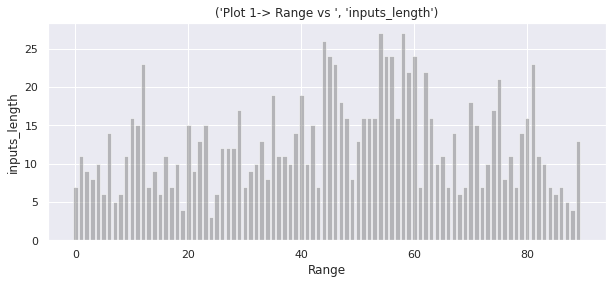

<Figure size 792x576 with 0 Axes>

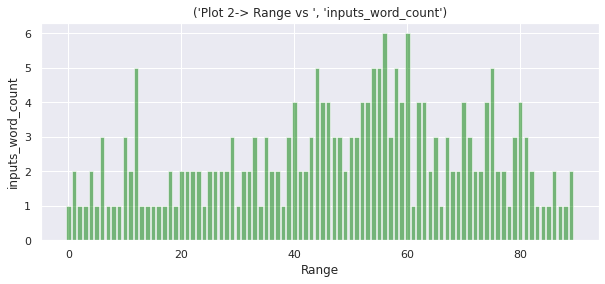

<Figure size 792x576 with 0 Axes>

In [99]:
plot_inputs_based_tags('inputs_word_count','inputs_length')

## 10. Collecting data for graphical analysis

           inputs      tags  inputs_word_count  inputs_length  \
0         hello!!  greeting                  1              7   
1     hi! there..  greeting                  2             11   
2       welcome!!  greeting                  1              9   
3        nice:>:>  greeting                  1              8   
4      wind up...  greeting                  2             10   
..            ...       ...                ...            ...   
85         cancel       pre                  1              6   
86        love me       pre                  2              7   
87          token       pre                  1              5   
88           coin       pre                  1              4   
89  have mercy!!!       pre                  2             13   

    unique_word_count  mean_word_length  
0                   1               7.0  
1                   2               5.0  
2                   1               9.0  
3                   1               8.0  
4        

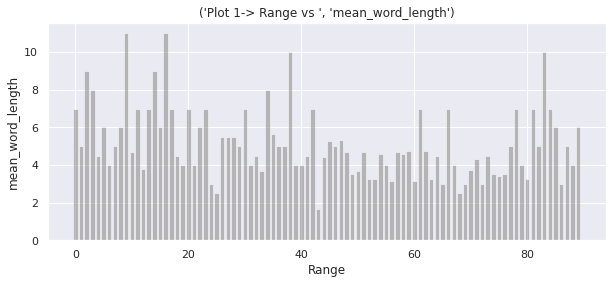

<Figure size 792x576 with 0 Axes>

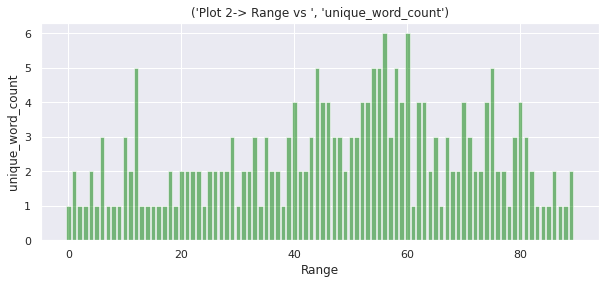

<Figure size 792x576 with 0 Axes>

In [100]:
data['unique_word_count']=data.inputs.map(lambda x:len(set(str(x).split())))
data['mean_word_length']=data.inputs.map(lambda x:np.mean([len(w) for w in str(x).split()]))
print(data)
plot_inputs_based_tags('unique_word_count','mean_word_length')

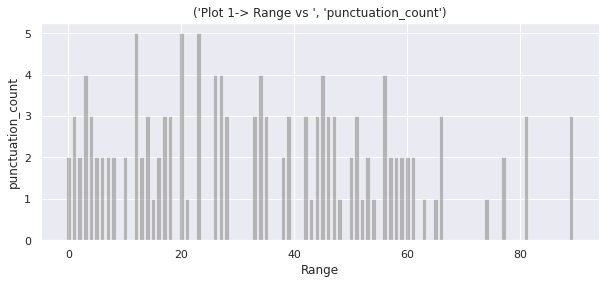

<Figure size 792x576 with 0 Axes>

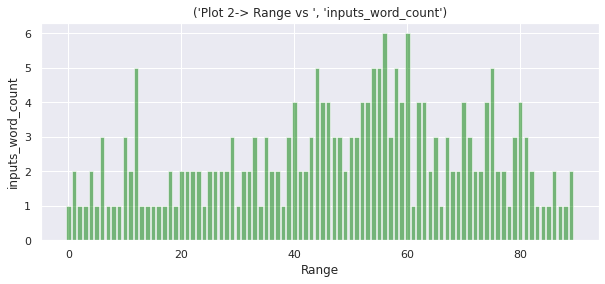

<Figure size 792x576 with 0 Axes>

In [101]:
import string
data['punctuation_count']=data['inputs'].map(lambda x:len([c for c in str(x) if c in string.punctuation]))
plot_inputs_based_tags('inputs_word_count','punctuation_count')

## 11. Final dataset after data mining

In [63]:
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
data

,inputs,tags,inputs_word_count,inputs_length,unique_word_count,mean_word_length,punctuation_count
0,hello,greeting,1,7,1,7.0,2
1,hi there,greeting,2,11,2,5.0,3
2,welcome,greeting,1,9,1,9.0,2
3,nice,greeting,1,8,1,8.0,4
4,wind up,greeting,2,10,2,4.5,3
...,...,...,...,...,...,...,...
85,cancel,prerequisites,1,6,1,6.0,0
86,love me,prerequisites,2,7,2,3.0,0
87,token,prerequisites,1,5,1,5.0,0
88,coin,prerequisites,1,4,1,4.0,0


## 12. Importing libraries for natural processing 

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [65]:
input_shape=x_train.shape[1]
print(input_shape)
output_shape=len(y_train)
print(output_shape)

6
90


## 13. Vocabularies load in the word dictionary

In [66]:
vocabulary=len(tokenizer.word_index)
print("number of unique words: ",vocabulary)
output_length=le.classes_.shape[0]
print("output length: ",output_length)

number of unique words:  130
output length:  6


## 14. Creating model using LSTM 

In [67]:
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation="softmax")(x)
model=Model(i,x)

## 15. Compiling and training the model using deep learning and RNN-LSTM

In [68]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [69]:
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 7ms/step - loss: 1.7924 - accuracy: 0.1111
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7901 - accuracy: 0.2111
Epoch 3/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7885 - accuracy: 0.2889
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7868 - accuracy: 0.2667
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 1.7848 - accuracy: 0.2667
Epoch 6/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7831 - accuracy: 0.2444
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7816 - accuracy: 0.2444
Epoch 8/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7797 - accuracy: 0.2444
Epoch 9/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7778 - accuracy: 0.2444
Epoch 10/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7756 - accuracy: 0.2444
Epoch 11/200
3/3 [===========

## 16. Plotting accuracy and loss metrics

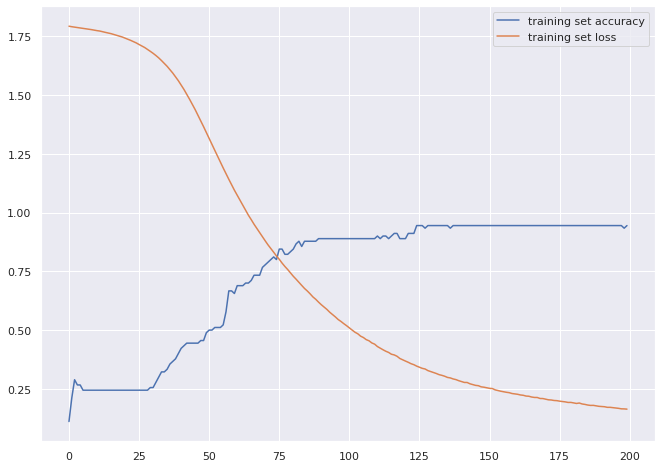

In [102]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()
plt.savefig('plot6')

## 17. Predicting outputs from the trained model

In [71]:
import random
while True:
  texts_p=[]
  print("Jarvis here.....How may i entertain you???")
  given_input=input('You  :')
  prediction_input=[letters.lower() for letters in given_input if letters not in string.punctuation]
  prediction_input=''.join(prediction_input)
  texts_p.append(prediction_input)
  prediction_input=tokenizer.texts_to_sequences(texts_p)
  prediction_input=np.array(prediction_input).reshape(-1)
  prediction_input=pad_sequences([prediction_input],input_shape)
  output=model.predict(prediction_input)
  output=output.argmax()
  response_tag=le.inverse_transform([output])[0]
  print("Jarvis : ",random.choice(responses[response_tag]))
  if given_input=="bye":
    break

Jarvis here.....How may i entertain you???
You  :hi
Jarvis :  Welcome to the world of Jarvis
Jarvis here.....How may i entertain you???
You  :Thank you
Jarvis :  The universe is too big
Jarvis here.....How may i entertain you???
You  :tell me something
Jarvis :  Mighty king Solomon
Jarvis here.....How may i entertain you???
You  :king solomon was?
Jarvis :  Thank you
Jarvis here.....How may i entertain you???
You  :ok i understand
Jarvis :  Thank you
Jarvis here.....How may i entertain you???
You  :What do you know?
Jarvis :  The China–Nepal border runs across its summit point
Jarvis here.....How may i entertain you???
You  :ok how do you know that?
Jarvis :  situated in the Mahalangur Himal sub-range of the Himalayas
Jarvis here.....How may i entertain you???
You  :thats cool
Jarvis :  We are lost
Jarvis here.....How may i entertain you???
You  :where?
Jarvis :  Tchoumour Lancma
Jarvis here.....How may i entertain you???
You  :who was that?
Jarvis :  Go take a short nap
Jarvis here...